In [12]:
# !kaggle datasets download -d paramaggarwal/fashion-product-images-small
# !unzip fashion-product-images-small.zip -d fashionSmall

In [13]:
import pandas as pd
import os

curr_dir = os.getcwd()
df = pd.read_csv(curr_dir + "/fashionSmall/styles.csv", on_bad_lines="skip")
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,20858,Women,Accessories,Eyewear,Sunglasses,Olive,Winter,2016.0,Casual,United Colors of Benetton Women Casual Olive S...,20858.jpg
1,25256,Women,Accessories,Bags,Backpacks,Orange,Winter,2015.0,Casual,Lino Perros Women Orange Backpacks,25256.jpg
2,28456,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2012.0,Sports,Urban Yoga Women Blue Skirt With Leggings,28456.jpg
3,26096,Men,Apparel,Topwear,Shirts,Blue,Summer,2012.0,Formal,John Miller Men Check Blue Shirt,26096.jpg
4,45989,Women,Apparel,Saree,Sarees,Green,Summer,2012.0,Ethnic,Fabindia Green Mangalagiri Saree,45989.jpg


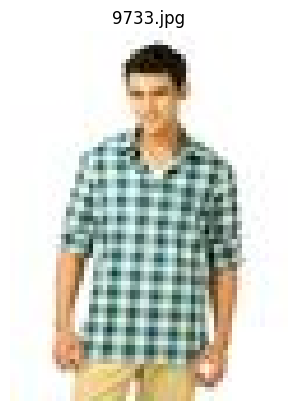

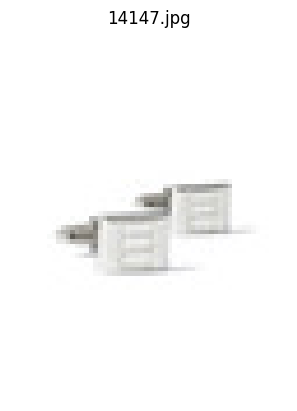

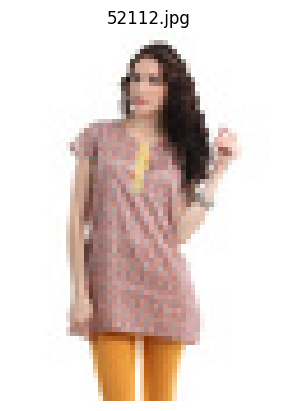

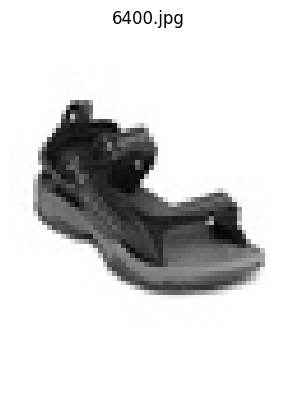

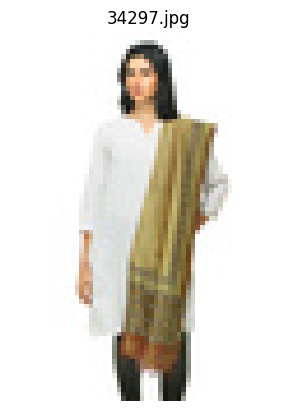

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder = curr_dir + "/fashionSmall/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files[:5]:
    img_path = os.path.join(image_folder, img_file)

    img = Image.open(img_path)

    plt.imshow(img)
    plt.title(img_file)
    plt.axis("off")
    plt.show()

In [15]:
# check image size
import os
from PIL import Image

image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
img_path = os.path.join(image_folder, image_files[0])
img = Image.open(img_path)
img.size


(60, 80)

In [16]:
categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

for col in categorical_columns:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


gender Value Counts:
gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64

masterCategory Value Counts:
masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

subCategory Value Counts:
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree    

<Figure size 1000x600 with 0 Axes>

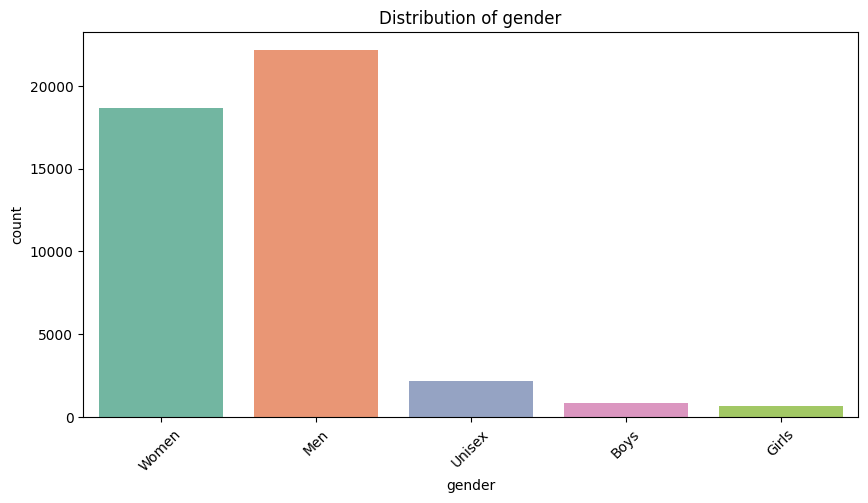

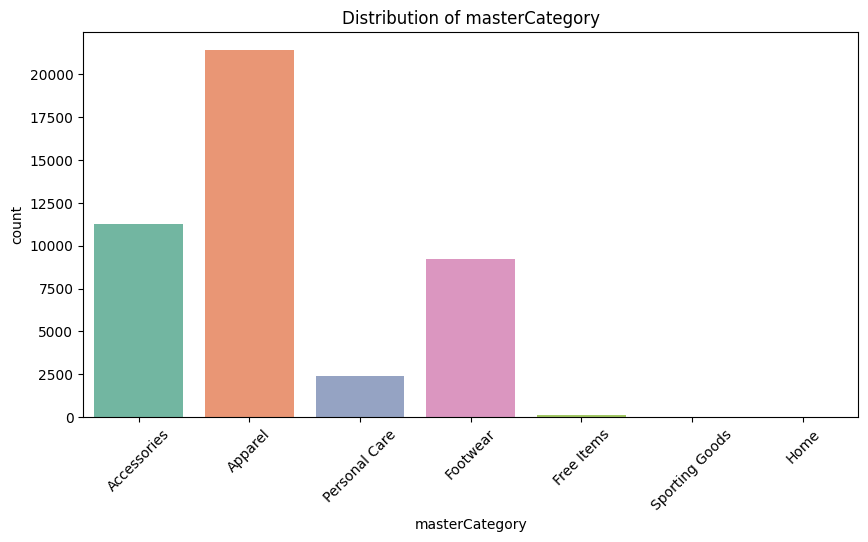

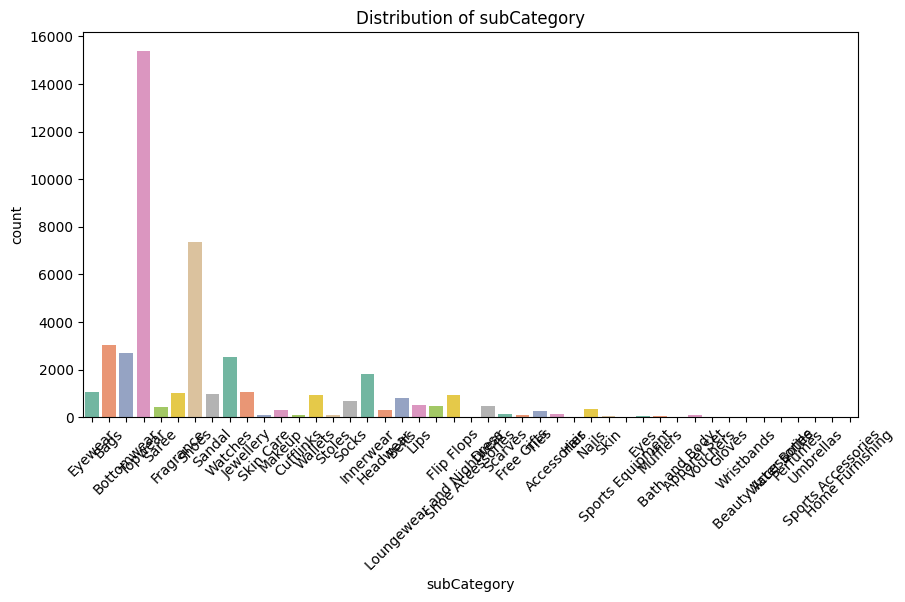

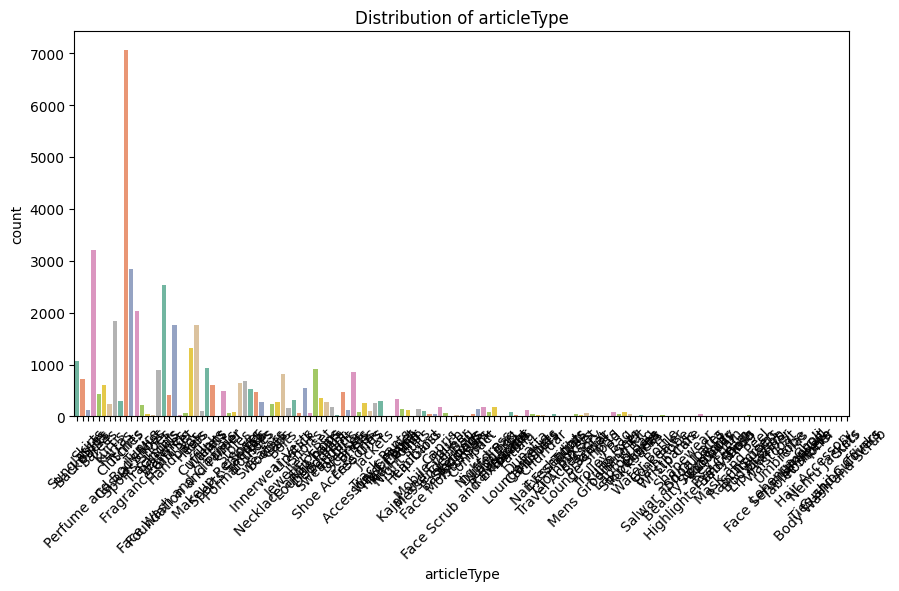

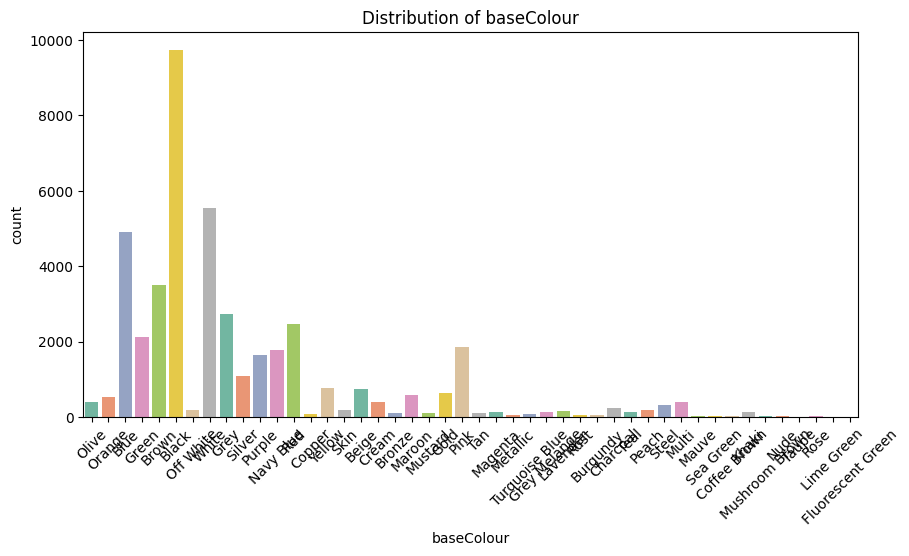

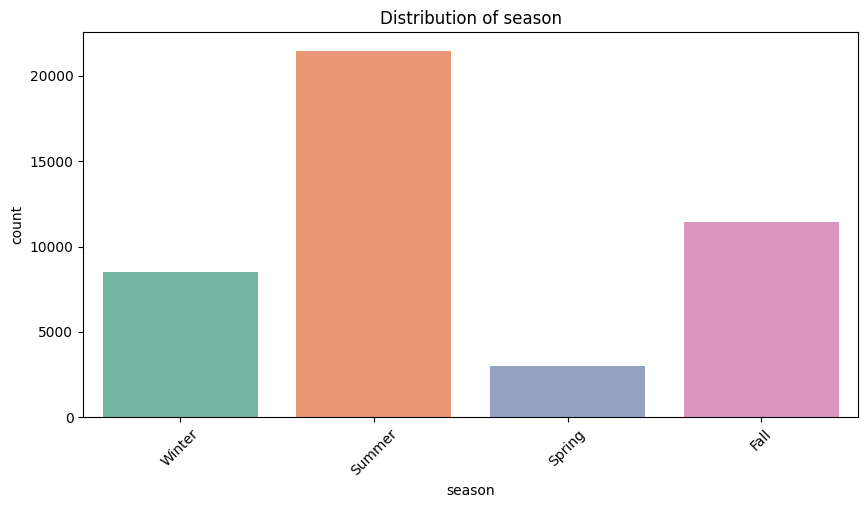

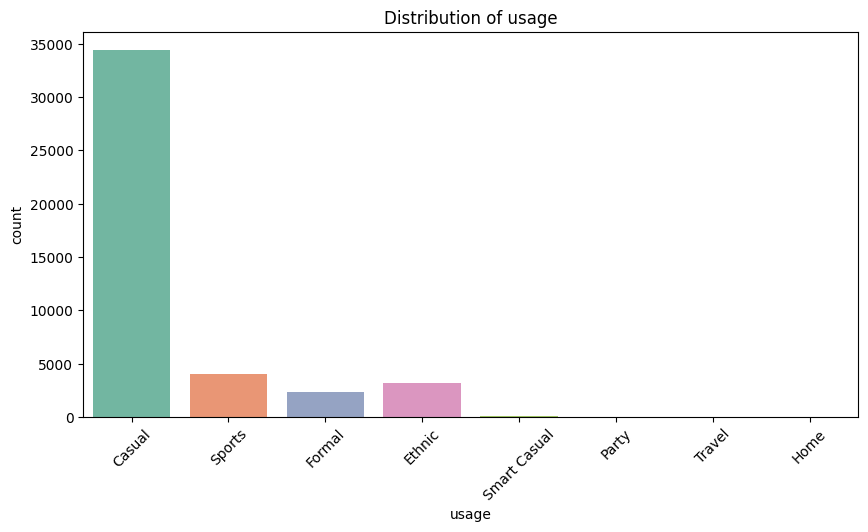

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

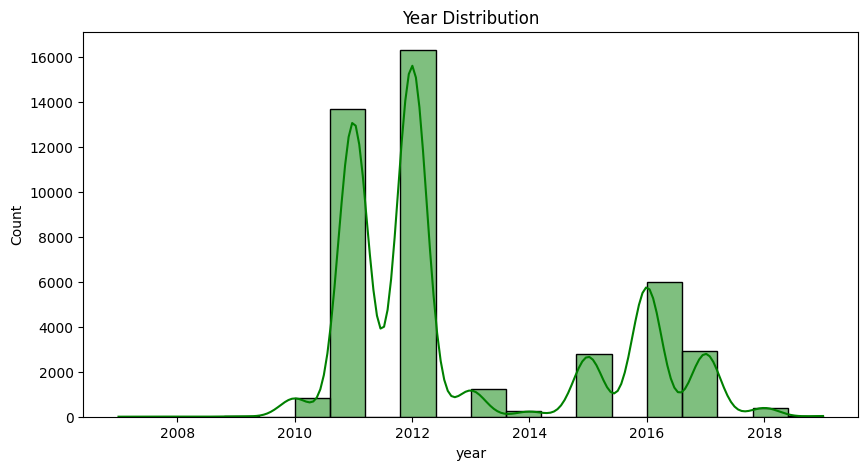

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['year'], kde=True, color='green', bins=20)
plt.title("Year Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

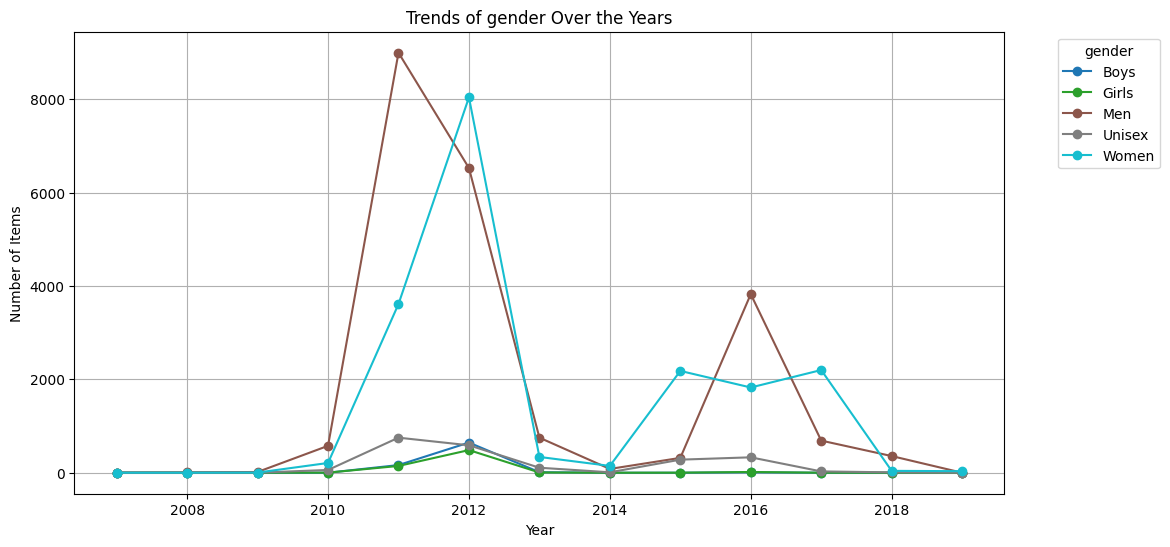

<Figure size 1200x600 with 0 Axes>

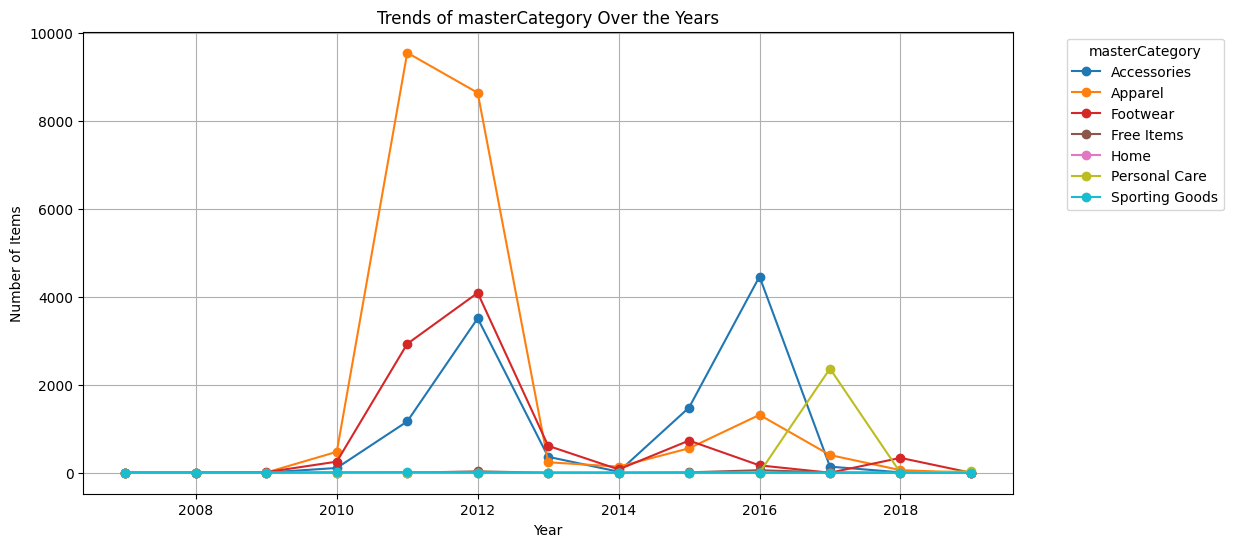

<Figure size 1200x600 with 0 Axes>

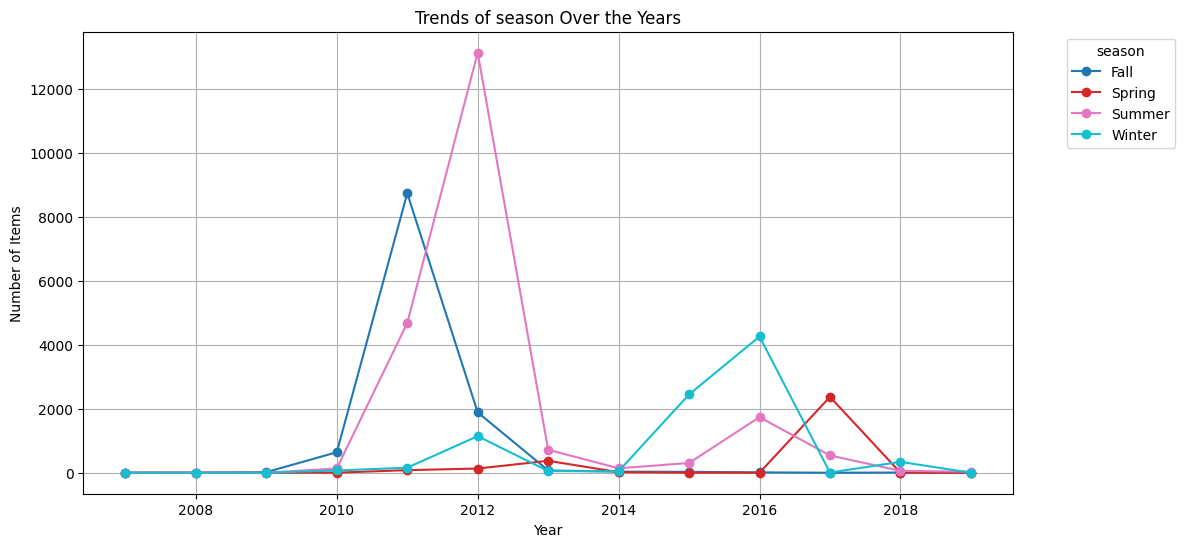

<Figure size 1200x600 with 0 Axes>

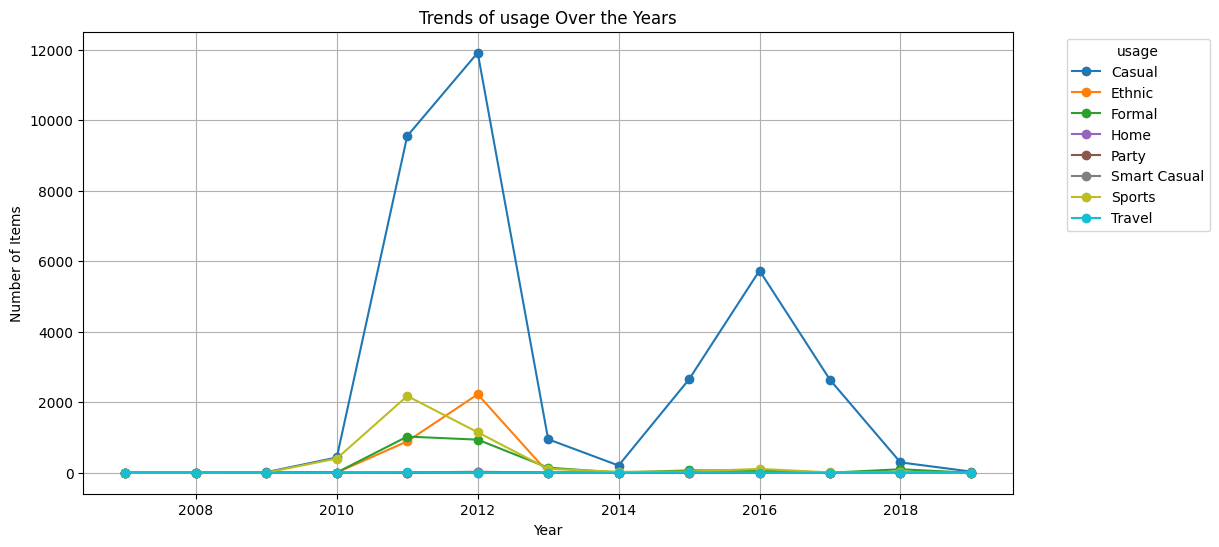

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_columns:
  if col != 'articleType' and col != 'baseColour' and col != 'subCategory':
    usage_trends = df.groupby(['year', col]).size().reset_index(name='count')

    usage_pivot = usage_trends.pivot(index='year', columns=col, values='count').fillna(0)
    plt.figure(figsize=(12, 6))
    usage_pivot.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
    plt.title(f"Trends of {col} Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Items")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
import os
from sklearn.model_selection import train_test_split


curr_dir = os.getcwd()

df = pd.read_csv(curr_dir + "/fashionSmall/styles.csv", on_bad_lines="skip")

#remove subcategories with less than 100 samples
min_samples = 100
subcategories_to_remove = df['subCategory'].value_counts()[df['subCategory'].value_counts() < min_samples].index
df = df[~df['subCategory'].isin(subcategories_to_remove)]

df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

print(f"Training Set: {len(train_df)} samples")
print(f"Validation Set: {len(valid_df)} samples")
print(f"Testing Set: {len(test_df)} samples")

batch_size = 32
image_folder = curr_dir + "/fashionSmall/images"  

image_generator = ImageDataGenerator()

training_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=True,
    subset="training"
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=True
)


test_generator = image_generator.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

Training Set: 28146 samples
Validation Set: 7037 samples
Testing Set: 8796 samples
Found 28142 validated image filenames belonging to 27 classes.
Found 7037 validated image filenames belonging to 27 classes.
Found 8795 validated image filenames belonging to 27 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 4 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(27, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 10, 10, 128)      

In [33]:
# Train the model
history = model.fit(
    training_generator,
    steps_per_epoch=len(train_df) // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(valid_df) // batch_size
)

Epoch 1/10


2025-04-09 22:37:41.334634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


878/879 [============================>.] - ETA: 0s - loss: 7.4469 - accuracy: 0.6416

2025-04-09 22:38:00.007821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


879/879 [==============================] - 21s 24ms/step - loss: 7.4452 - accuracy: 0.6418 - val_loss: 3.3987 - val_accuracy: 0.8099
Epoch 2/10
879/879 [==============================] - 21s 24ms/step - loss: 8.1621 - accuracy: 0.7485 - val_loss: 5.5720 - val_accuracy: 0.8396
Epoch 3/10
879/879 [==============================] - 21s 24ms/step - loss: 27.0135 - accuracy: 0.7679 - val_loss: 27.6214 - val_accuracy: 0.8251
Epoch 4/10
879/879 [==============================] - 20s 23ms/step - loss: 118.0187 - accuracy: 0.7951 - val_loss: 122.3868 - val_accuracy: 0.8644
Epoch 5/10
879/879 [==============================] - 20s 23ms/step - loss: 286.2288 - accuracy: 0.8242 - val_loss: 251.4852 - val_accuracy: 0.8863
Epoch 6/10
879/879 [==============================] - 20s 23ms/step - loss: 1113.1945 - accuracy: 0.8250 - val_loss: 1788.2870 - val_accuracy: 0.8809
Epoch 7/10
879/879 [==============================] - 21s 24ms/step - loss: 2612.5527 - accuracy: 0.8482 - val_loss: 2011.0808 - va

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_df) // batch_size)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

274/274 [==============================] - 3s 12ms/step - loss: 16348.5479 - accuracy: 0.9158
Test Accuracy: 91.58%


In [59]:
import numpy as np
predictions = model.predict(test_generator, steps=len(test_df) // batch_size)

predicted_labels = np.argmax(predictions, axis=1)  

true_labels = test_df['subCategory'].values 


class_indices = test_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}  


predicted_class_names = [inv_class_indices[label] for label in predicted_labels]

print(f"Predicted Labels (class names): \n{predicted_class_names[50:80]}")
print(f"True Labels (class names): \n{true_labels[50:80].tolist()}")

274/274 [==============================] - 3s 11ms/step
Predicted Labels (class names): 
['Topwear', 'Shoes', 'Innerwear', 'Eyewear', 'Topwear', 'Bags', 'Socks', 'Topwear', 'Topwear', 'Saree', 'Dress', 'Bags', 'Topwear', 'Innerwear', 'Innerwear', 'Jewellery', 'Jewellery', 'Innerwear', 'Shoes', 'Shoes', 'Topwear', 'Innerwear', 'Bags', 'Topwear', 'Shoes', 'Watches', 'Topwear', 'Eyewear', 'Belts', 'Topwear']
True Labels (class names): 
['Topwear', 'Shoes', 'Innerwear', 'Eyewear', 'Topwear', 'Bags', 'Socks', 'Innerwear', 'Topwear', 'Saree', 'Dress', 'Wallets', 'Topwear', 'Innerwear', 'Innerwear', 'Jewellery', 'Jewellery', 'Topwear', 'Shoes', 'Shoes', 'Topwear', 'Innerwear', 'Wallets', 'Topwear', 'Shoes', 'Watches', 'Topwear', 'Eyewear', 'Belts', 'Topwear']
